In [3]:
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.tree
import graphviz
import matplotlib as mpl
import matplotlib.pyplot as plt
import colorsys
import json

# Experiment 1.1.2: orange vs. brown, attempt 2.
This is the second attempt at experiment 1.1. This time a larger dataset is collected. The dataset is also stored in a slightly different format than before. The setup is the same as 1.1.1, so it will not be repeated here.

## Data
The format of the data is as follows.

In [7]:
data = pd.read_csv('./resources/experiment_1_1_2.csv')
data

ans  circle_r  circle_g  circle_b      bg_r      bg_g      bg_b
0       1  0.256328  0.138022  0.003227  0.842528  0.842528  0.842528
1       0  0.220064  0.104095  0.049352  0.179817  0.179817  0.179817
2       0  0.909456  0.460141  0.017742  0.185529  0.185529  0.185529
3       3  0.982861  0.923622  0.719634  0.667206  0.667206  0.667206
4       3  0.844324  0.850299  0.696988  0.624025  0.624025  0.624025
...   ...       ...       ...       ...       ...       ...       ...
1298    0  0.540997  0.307284  0.127805  0.336290  0.336290  0.336290
1299    3  0.691200  0.675850  0.125323  0.362580  0.362580  0.362580
1300    1  0.179906  0.144833  0.075628  0.084772  0.084772  0.084772
1301    3  0.096047  0.074515  0.046541  0.669724  0.669724  0.669724
1302    3  0.480772  0.487775  0.284502  0.887272  0.887272  0.887272

[1303 rows x 7 columns]

There is redundancy in the 3 RGB values for the background color, so we will reduce them to 1, and call the column simply `bg`.

In [20]:
data = data[['ans', 'circle_r', 'circle_g', 'circle_b', 'bg_r']].rename(columns={'bg_r':'bg'})
data

ans  circle_r  circle_g  circle_b        bg
0       1  0.256328  0.138022  0.003227  0.842528
1       0  0.220064  0.104095  0.049352  0.179817
2       0  0.909456  0.460141  0.017742  0.185529
3       3  0.982861  0.923622  0.719634  0.667206
4       3  0.844324  0.850299  0.696988  0.624025
...   ...       ...       ...       ...       ...
1298    0  0.540997  0.307284  0.127805  0.336290
1299    3  0.691200  0.675850  0.125323  0.362580
1300    1  0.179906  0.144833  0.075628  0.084772
1301    3  0.096047  0.074515  0.046541  0.669724
1302    3  0.480772  0.487775  0.284502  0.887272

[1303 rows x 5 columns]

### Circle and background color generation function
A change was made to the color generation function used in the previous attempt.

After a color was generated, with the same procedure as before, a check was done to skip color pairs that we are very confident are going to be neither orange nor brown. This decision was done by training a logistic regression classifier such that it had 100% recall on the data from
the previous attempt. This was done to reduce the number of "neither" data points, where were very numerous in the previous attempt.

### Figure colors
The below figures will use a color scheme created in this section.

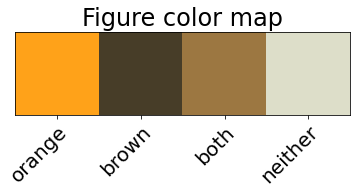

In [21]:
orange_marker_color = '#ffa219'
brown_marker_color = '#473d28'
both_marker_color = '#9c7741'
neither_marker_color = '#dddec9'
# orange, brown, both, neither
plot_colors = [orange_marker_color, brown_marker_color, both_marker_color, neither_marker_color]
color_list = [plot_colors[i] for i in data.loc[:,'ans']]

colors_as_vec = [mpl.colors.to_rgb(c) for c in plot_colors ]
fig, ax = plt.subplots()
img = ax.imshow(np.array([colors_as_vec]))
# plt.gca().set_xticklabels(['a', 'b', 'c', 'd'])
ax.set_xticklabels(['orange', 'brown', 'both', 'neither'])
plt.xticks(np.arange(0, 4, 1.0))
ax.get_yaxis().set_visible(False)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor");
ax.set_title("Figure color map");

In [83]:
#### Figure 1: RGB scatter plots, colored by answer
ax1 = pd.plotting.scatter_matrix(data.loc[:, data.columns != 'ans'],
                          c=color_list,
                          figsize=[20,20],
                          diagonal=None,
                          alpha=0.7,
                          s=200,
                          marker='*')
ax1[0,0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))
plt.suptitle('Figure 1. Matrix of Scatter Plots for All Color Columns (RGB), with Points Colored by Answer');
# Why is the title so far away?

NameError: name 'combined_data' is not defined

### Notes on figure 1
These results are similar to what we saw previously. 

Below we will plot the same data, transformed to HSV.

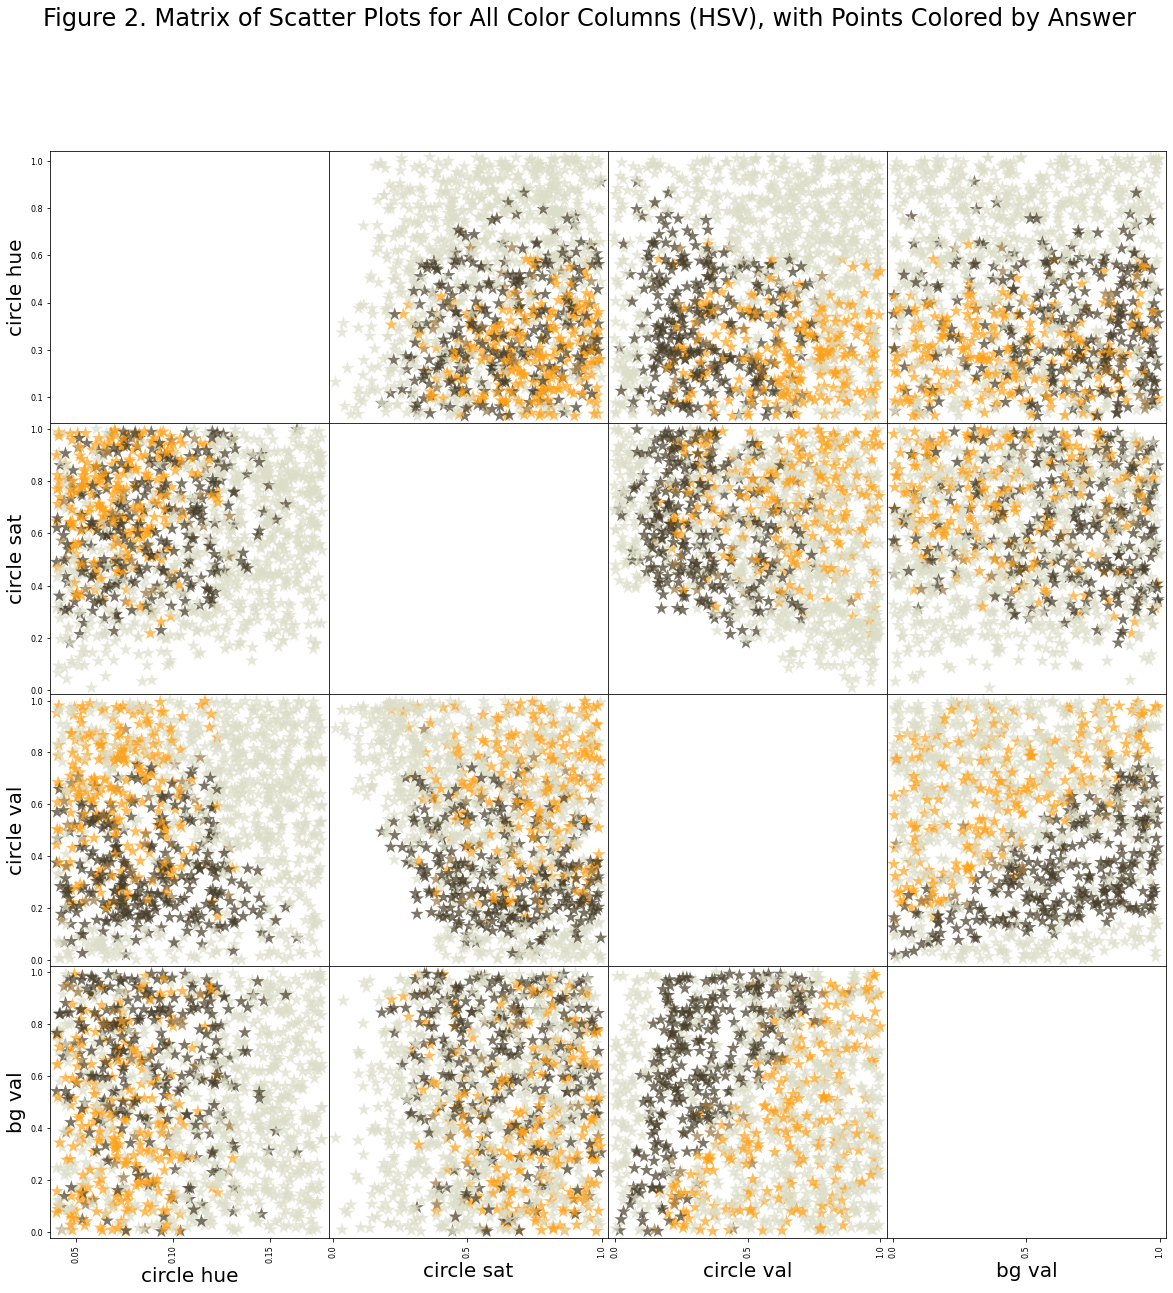

In [80]:
def to_hsv(d):
    d = pd.concat([pd.DataFrame([
        [row['ans'], *colorsys.rgb_to_hsv(row['circle_r'], row['circle_g'], row['circle_b']), 
         colorsys.rgb_to_hsv(*[row['bg'],]*3)[2]]],
        columns=['ans', 'circle hue', 'circle sat', 'circle val', 'bg val'])
     for idx, row in d.iterrows()])
    return d

color_list = [plot_colors[i] for i in data.loc[:,'ans']]
ax2 = pd.plotting.scatter_matrix(data_hsv.loc[:, data_hsv.columns != 'ans'],
                          c=color_list,
                          figsize=[20,20],
                          #diagonal='hist',
                          diagonal=None,
                          alpha=0.7,
                          s=200,
                          marker='*')
plt.suptitle('Figure 2. Matrix of Scatter Plots for All Color Columns (HSV), with Points Colored by Answer');
ax2[0,0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))

### Notes on figure 2
This data is clearer than that from 1.1.1. It's much clearer here how the the circle brightness and background brightness define the difference between orange and brown.

### Remarks
Experiment 1.1.1 seems to capture the orange/brown phenomenon. Hopefully the data will be useful as a comparison. The circle val vs. background val scatter chart implies that a roughly linear boundary exists that separates the two colors. 

## Combined data
Below, the plots are repeated for the combined data from 1.1.1 and 1.1.2.

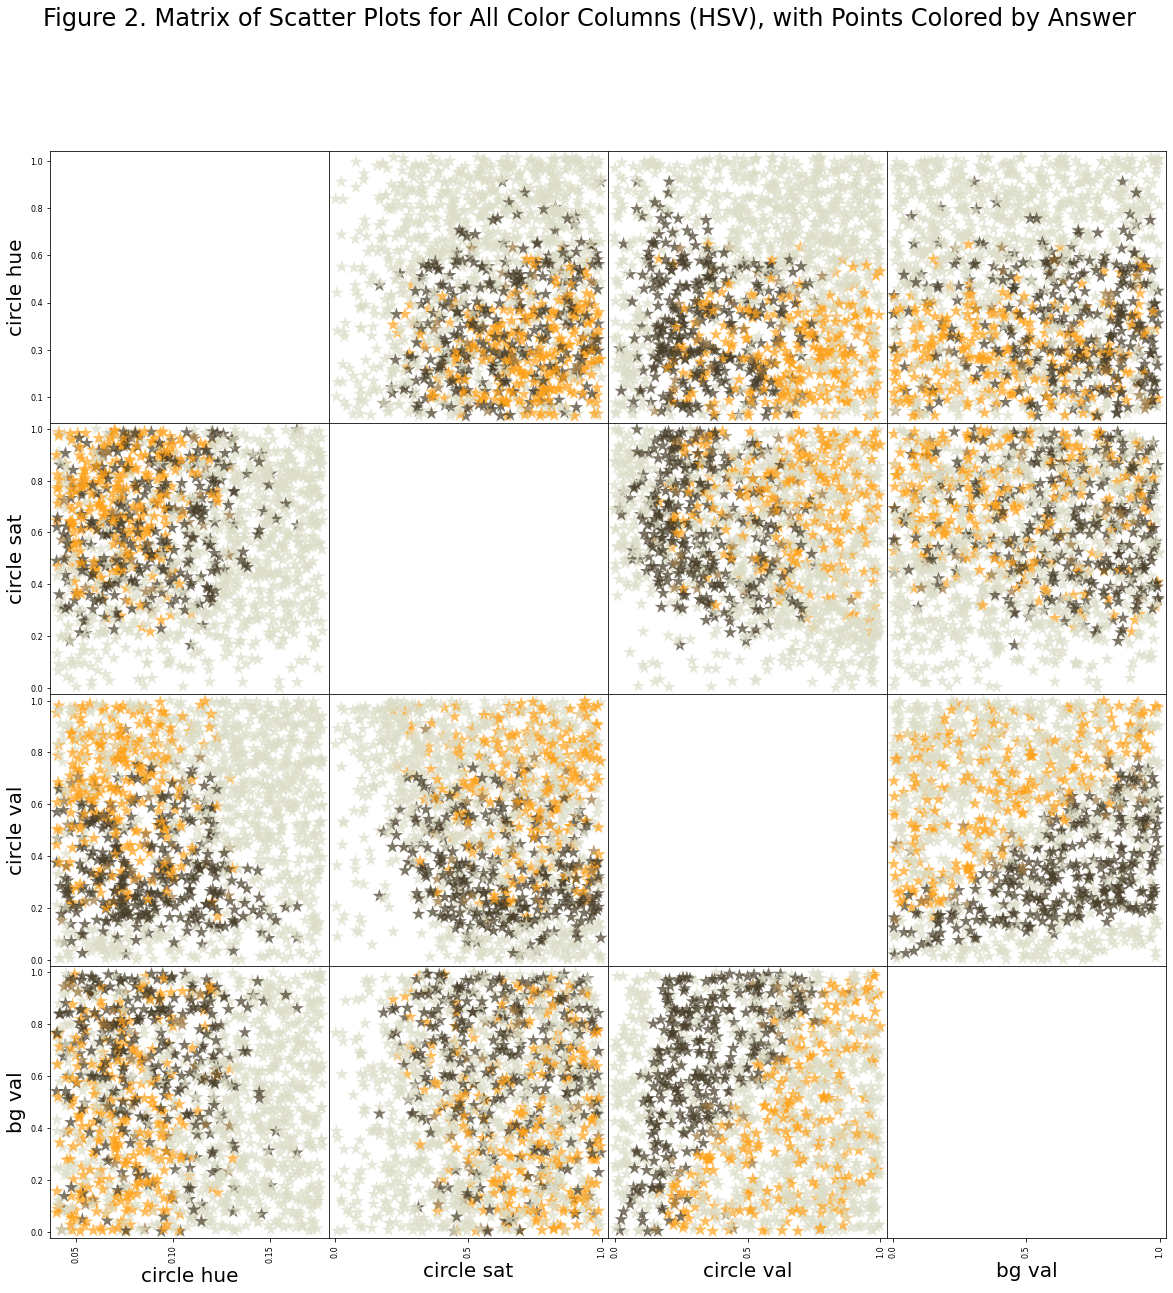

In [164]:
data_combined = pd.read_csv('./resources/experiment_1_1_combined_edited.csv')
data_combined = data_combined[['ans', 'circle_r', 'circle_g', 'circle_b', 'bg_r']].rename(columns={'bg_r':'bg'})
color_list = [plot_colors[i] for i in data_combined.loc[:,'ans']]
data_combined_hsv = to_hsv(data_combined)
ax2 = pd.plotting.scatter_matrix(data_combined_hsv.drop('ans', axis=1),
                          c=color_list,
                          figsize=[20,20],
                          #diagonal='hist',
                          diagonal=None,
                          alpha=0.7,
                          s=200,
                          marker='*')
plt.suptitle('Figure 2. Matrix of Scatter Plots for All Color Columns (HSV), with Points Colored by Answer');
ax2[0,0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))

## Linear classifier
Below we train a classifier to distinguish between the orange and brown classes only. The below classifier achieves 96.7% accuracy on the training data.

data shape: (1517, 5)
v: [-7.03104491 10.28096531  0.37507998 -1.2822228 ], b: [0.00626768]
Accuracy: 0.8175033921302578
Worst data:
      circle_r  circle_g  circle_b        bg  ans  predict      pval
137  0.652498  0.297813  0.181047  0.879301    1        0  2.579227
162  0.613541  0.270272  0.077193  0.652228    1        0  2.336255
197  0.908334  0.284562  0.038937  0.612260    1        0  4.225148
752  0.611837  0.222941  0.081930  0.798816    1        0  2.997065


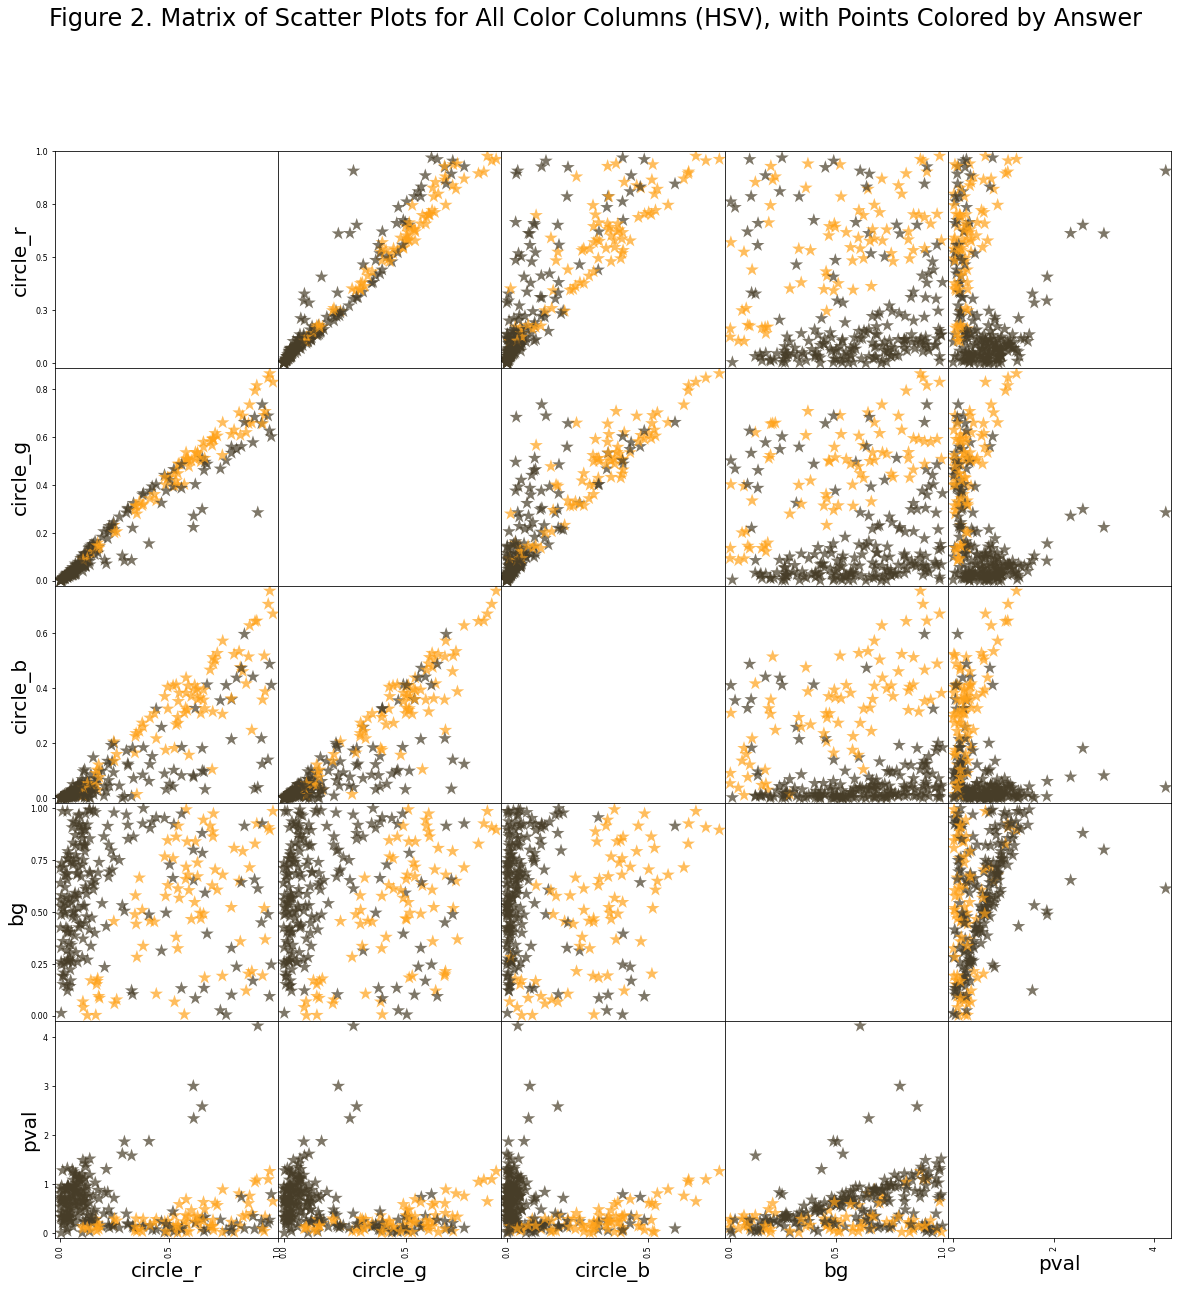

In [176]:
columns = ['circle hue', 'circle sat', 'circle val', 'bg val']
columns = ['circle_r', 'circle_g', 'circle_b', 'bg']

def as_Xy(data, class_0, class_1):
    all_classes = class_0 +  class_1
    filtered = data[data['ans'].isin(all_classes)]
    X = filtered[columns]
    y = filtered['ans']
    y = y.apply(lambda i : 0 if i in class_0 else 1)
    return X,y
    
def classify(data):
    print(f'data shape: {data.shape}')
    X, y = as_Xy(data, class_0=(0,1), class_1=(3,))
    model = sk.linear_model.LogisticRegression(solver='liblinear', class_weight='balanced')
    model.fit(X, y)
    v = model.coef_[0]
    b = model.intercept_
    print(f'v: {v}, b: {b}')
    y_predict = model.predict(X)
    accuracy = sk.metrics.accuracy_score(y, y_predict)
    print(f'Accuracy: {accuracy}')
    df = pd.concat([X,y], axis=1)
    df['predict'] = y_predict
    df['pval'] = np.abs(X @ v + b)
    #worst_data = df.sort_values('pval', ascending=False).iloc[0:20]
    worst_data = df[(df['pval']> 2.0) & (df['ans'] != df['predict'])]
    print(f'Worst data:\n {worst_data}')
    #good_data = df.sort_values('pval', ascending=False).iloc[1:]
    # df['correct'] = df['ans'] != df['predict']
    #good_data = df[(df['pval']< 0.7) | (df['correct'] == 0.0)]
    df = df[df['ans'] != df['predict']]
    color_list = [plot_colors[i] for i in df.loc[:,'ans']]
    df = df.drop(['ans', 'predict'], axis=1)
    ax = pd.plotting.scatter_matrix(df,
                          c=color_list,
                          figsize=[20,20],
                          #diagonal='hist',
                          diagonal=None,
                          alpha=0.7,
                          s=200,
                          marker='*')
    plt.suptitle('Figure 2. Matrix of Scatter Plots for All Color Columns (HSV), with Points Colored by Answer');
    ax[0,0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))
classify(data_combined)
worst_data =[]